Welcome to Salary Prediction System
Press ENTER key to proceed


0 ... Salary_Dataset.csv


Select file to create ML model:  0


Salary_Dataset.csv is selected
Reading csv file
Dataset created


Enter test data size (between 0 and 1):  0.5


Model creation in progress
Model is created
Press ENTER key to predict test data



Test Results:
[4.] ... 55794 ... 63861.94850836267
[2.9] ... 56642 ... 54586.274987513854
[3.] ... 60150 ... 55429.51803486375
[6.] ... 93940 ... 80726.80945536052
[8.7] ... 109431 ... 103494.37173380758
[4.5] ... 61111 ... 68078.16374511214
[8.2] ... 113812 ... 99278.15649705814
[3.5] ... 61289 ... 59645.73327161321
[1.5] ... 37731 ... 42780.87232461537
[10.] ... 122391 ... 114456.5313493562
[9.5] ... 116969 ... 110240.31611260673
[7.9] ... 101302 ... 96748.42735500846
[7.1] ... 98273 ... 90002.48297620931

Press ENTER key to see graphical result


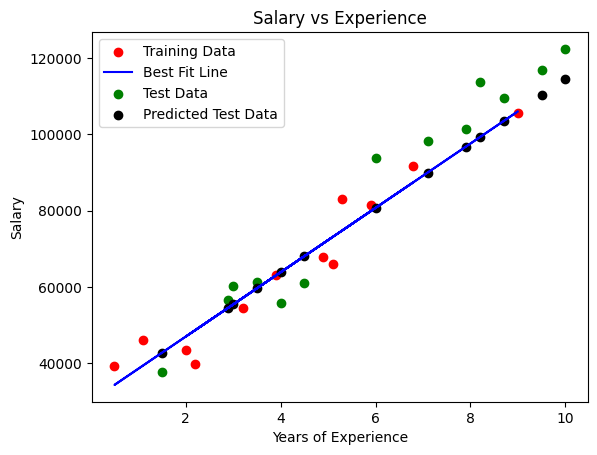

Our model is 92.13% accurate

Now you can predict salary of an employee using our model
Enter experience in years (comma separated): 


 2,2.5,3.7,8.5,9.6,5.5


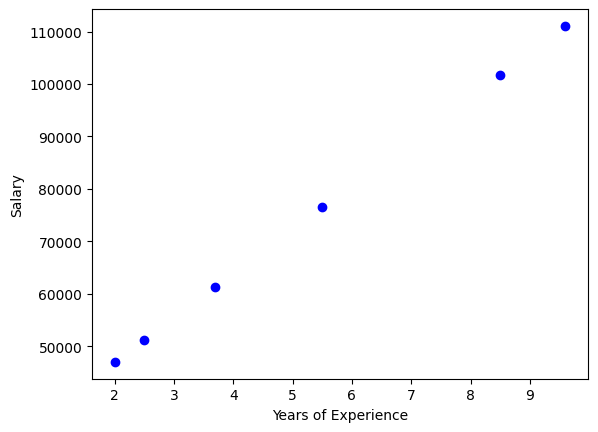

   Experience       Salaries
0         2.0   46997.087561
1         2.5   51213.302798
2         3.7   61332.219366
3         8.5  101807.885639
4         9.6  111083.559160
5         5.5   76510.594219

Press ENTER key to end


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


def welcome():
    print("Welcome to Salary Prediction System")
    print("Press ENTER key to proceed")
    input()


def checkcsv():
    csv_files = []
    cur_dir = os.getcwd()  # Get current directory
    content_list = os.listdir(cur_dir)

    for x in content_list:
        if x.split('.')[-1] == 'csv':
            csv_files.append(x)

    if len(csv_files) == 0:
        return 'No csv file in the directory'
    else:
        return csv_files


def display_and_select_csv(csv_files):
    for i, file_name in enumerate(csv_files):
        print(i, '...', file_name)

    index = int(input("Select file to create ML model: "))
    return csv_files[index]


def graph(X_train, Y_train, regressionObject, X_test, Y_test, Y_pred):
    plt.scatter(X_train, Y_train, color='red', label='Training Data')
    plt.plot(X_train, regressionObject.predict(X_train),
             color='blue', label='Best Fit Line')
    plt.scatter(X_test, Y_test, color='green', label='Test Data')
    plt.scatter(X_test, Y_pred, color='black', label='Predicted Test Data')

    plt.title("Salary vs Experience")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.show()


def main():
    welcome()

    try:
        csv_file = checkcsv()
        if csv_file == "No csv file in the directory":
            raise FileNotFoundError

        csv_file = display_and_select_csv(csv_file)
        print(csv_file, 'is selected')

        print('Reading csv file')
        dataset = pd.read_csv("Salary_Dataset.csv")
        print('Dataset created')

        X = dataset.iloc[:, :-1].values
        Y = dataset.iloc[:, -1].values

        s = float(input('Enter test data size (between 0 and 1): '))

        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=s)

        print("Model creation in progress")
        regressionObject = LinearRegression()
        regressionObject.fit(X_train, Y_train)
        print("Model is created")

        print("Press ENTER key to predict test data")
        input()

        Y_pred = regressionObject.predict(X_test)

        print("\nTest Results:")
        for i in range(len(X_test)):
            print(X_test[i], '...', Y_test[i], '...', Y_pred[i])

        print("\nPress ENTER key to see graphical result")
        input()

        graph(X_train, Y_train, regressionObject, X_test, Y_test, Y_pred)

        r2 = r2_score(Y_test, Y_pred)
        print("Our model is %2.2f%% accurate" % (r2 * 100))

        print("\nNow you can predict salary of an employee using our model")
        print("Enter experience in years (comma separated): ")

        exp = [float(e) for e in input().split(',')]
        experience = np.array(exp).reshape(-1, 1)

        salaries = regressionObject.predict(experience)

        plt.scatter(experience, salaries, color='blue')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary')
        plt.show()

        d = pd.DataFrame({
            'Experience': exp,
            'Salaries': salaries
        })
        print(d)

        print("\nPress ENTER key to end")
        input()

    except FileNotFoundError:
        print("No csv file in the directory")
        print("Press ENTER key to exit")
        input()
        exit()


if __name__ == "__main__":
    main()
